In [126]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
# Загружаем встроенный набор данных Ирисы, потому что с UCI не задалось с Header'ом
iris = datasets.load_iris()
# Смотрю на переменные и первые 10 строк данных 
print(iris.feature_names)
print(iris.data[:10])
print(iris.target_names)
print(iris.target)
# Для удобства сделал себе DataFrame
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame

   

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


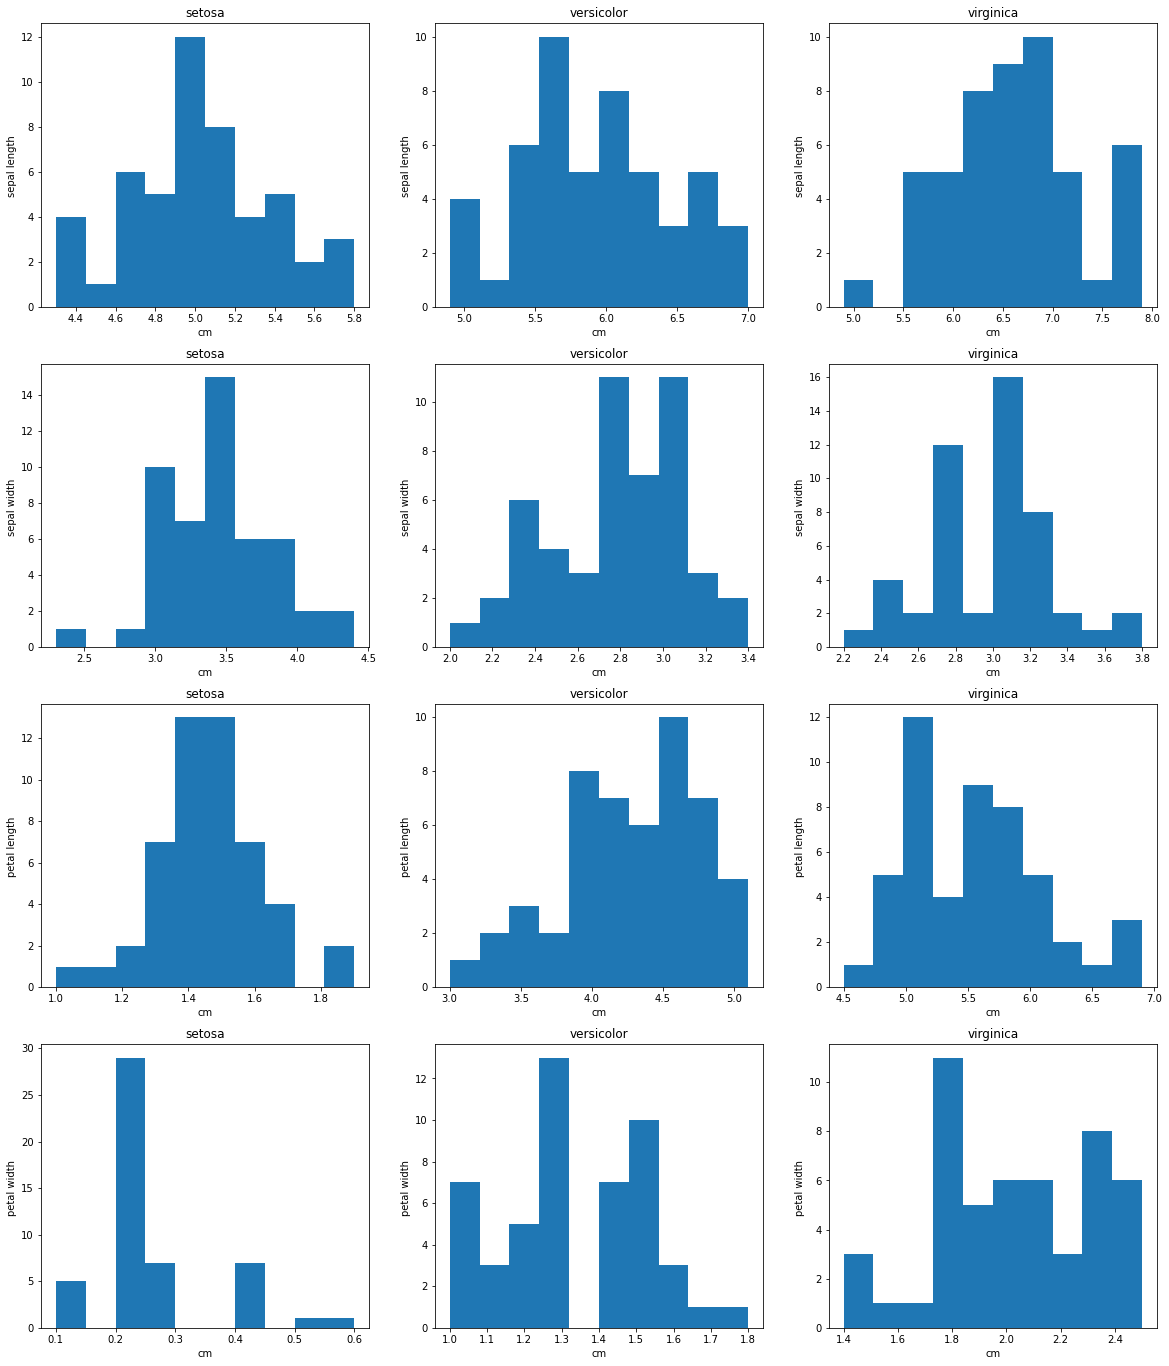

In [104]:
# Для наглядности строим гистрограммы по каждому признаку
pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
       plot_number += 1
       pyplot.subplot(4, 3, plot_number)
       pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
       pyplot.title(target_name)
       pyplot.xlabel('cm')
       pyplot.ylabel(feature_name[:-4])

In [105]:
# смотрим на математические значения зависимостей, которые стали очевидны выше
iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


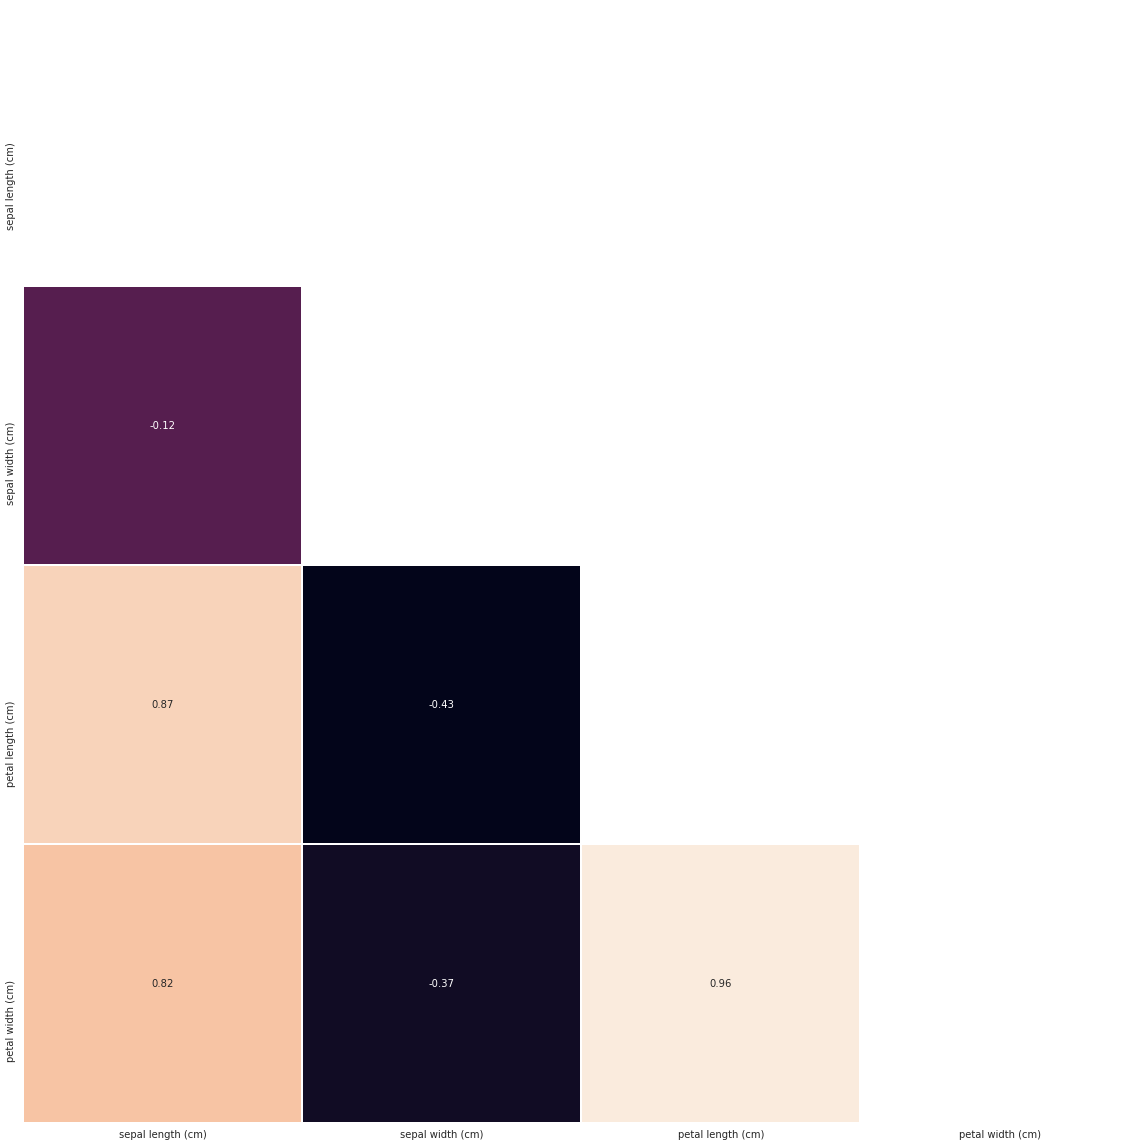

In [108]:
# строим матрицу корреляции, где до 0,2 - очень слабая, до 0,5 - слабая, до 0,7 - средняя, до 0,9 - высокая, больше 0,9 - очень высокая
import seaborn as sns
corr = iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)

In [113]:
# смотрим на метрики качества модели по переменным, которые имеют самую сильную зависимость (petal length и petal width)
from scipy import polyval, stats
fit_output = stats.linregress(iris_frame[['petal length (cm)','petal width (cm)']])
slope, intercept, r_value, p_value, slope_std_error = fit_output
print(slope, intercept, r_value, p_value, slope_std_error)

0.41575541635241114 -0.36307552131902776 0.9628654314027963 4.6750039073255014e-86 0.009582435790766206


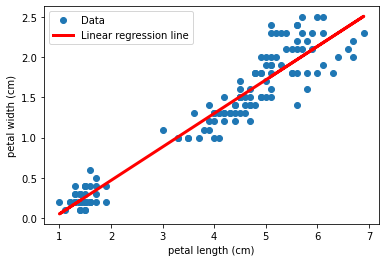

In [119]:
# строим график линейное регрессии
plt.plot(iris_frame[['petal length (cm)']], iris_frame[['petal width (cm)']],'o', label='Data')
plt.plot(iris_frame[['petal length (cm)']], intercept + slope*iris_frame[['petal length (cm)']], 'r', linewidth=3, label='Linear regression line')
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.legend()
plt.show()